Import module printing the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv("/content/drive/MyDrive/DATA/Final Dataset.csv")
data.head()

<ipython-input-3-2c60e085f719>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/DATA/Final Dataset.csv")


,Text,label,Vader,Final,Code,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,`- This is not ``creative``. Those are the di...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,` :: the term ``standard model`` is itself le...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,"True or false, the situation as of March 200...",0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,"Next, maybe you could work on being less cond...",0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,This page will need disambiguation.,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Sample data
sample_data = data.sample(10000, random_state=1)
X = sample_data['Text']
y = sample_data['label']

In [20]:
from wordcloud import WordCloud

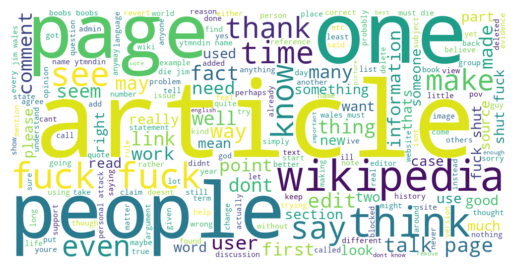

In [21]:
# Sample a subset of the data to avoid processing the entire dataset
sample_data = data['Text'].sample(10000, random_state=1)  # Adjust the sample size as needed

# Create a string with all text data from the sample
word_cloud = " ".join(str(text) for text in sample_data)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=10).generate(word_cloud)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

Trying to figure out the rows and coloumns

In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r':|<|>|>>', '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


data['Text'] = data['Text'].apply(clean_text)

In [ ]:

data.head()
data.shape

Eliminate last 17 thousand dataset beacuse its too long and time wasting

In [7]:
data = data.iloc[:10000,:]

figure out again

In [8]:
data.shape

(10000, 11)

try to count the uniquw value

In [23]:
data['label'].value_counts()

,count
label,
0,8962
1,1038


visualize the leable

<Axes: xlabel='label'>

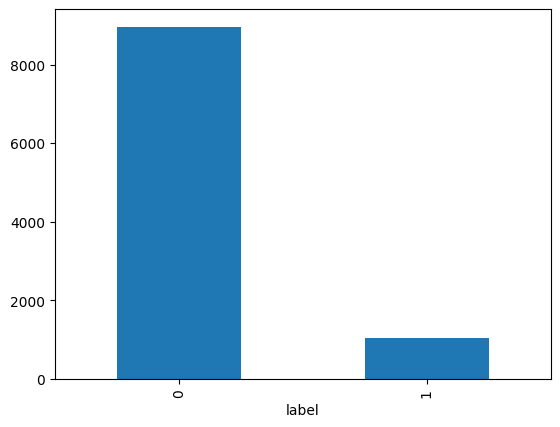

In [24]:
data['label'].value_counts().plot(kind='bar')

Creating a pie chart for the label i got

Text(0.5, 1.0, 'label distribution')

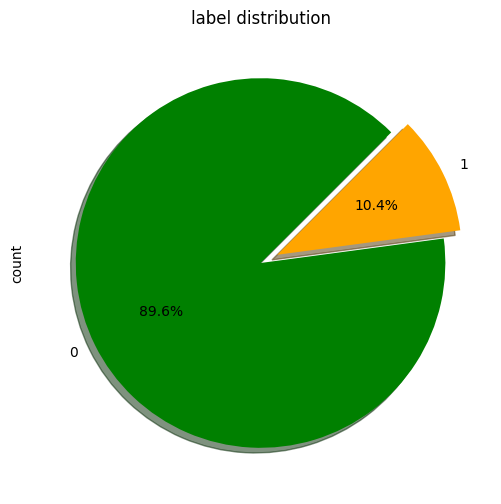

In [11]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

the code is trying to extract the value at the 999th position within the  column

In [12]:
data['Text'][999]

'requested move levellers levellers line wikipedianaming conventionsavoid definite article add support oppose proposal followed add discussion proposed move line'

visualizing the negetive and positive words,it counts frequents word of each category

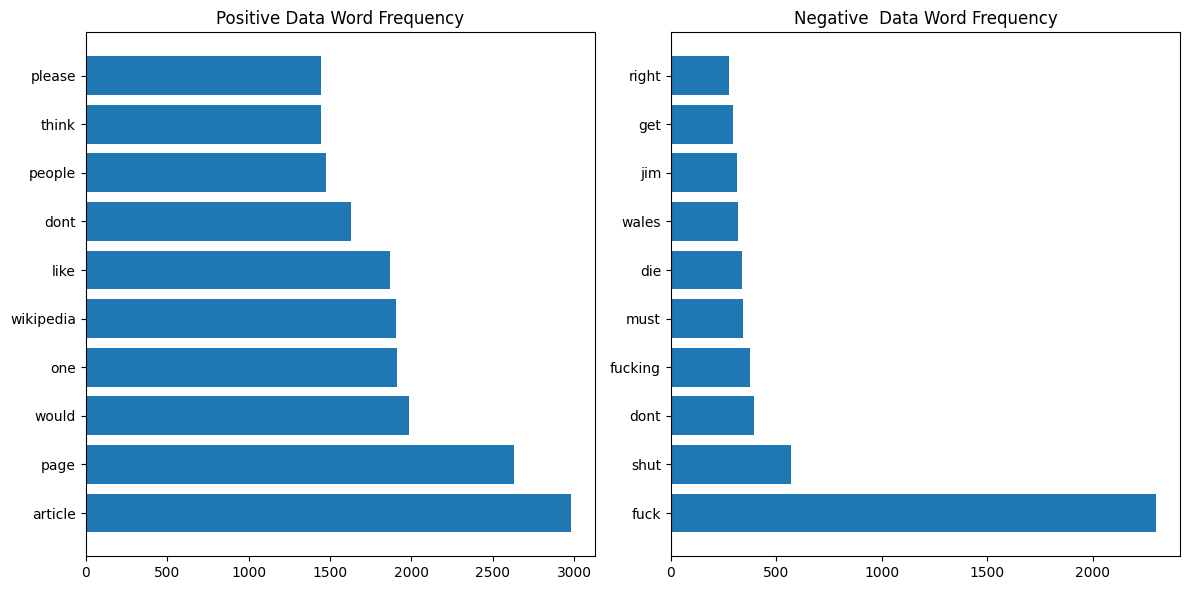

In [22]:
positivedata = data[data['label'] == 0]
positivedata = positivedata['Text']
negdata = data[data['label'] == 1]
negdata = negdata['Text']

import matplotlib.pyplot as plt
from collections import Counter


positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)


negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative  Data Word Frequency')

plt.tight_layout()
plt.show()


Text to numbering featuress


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.Text)

training model

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [16]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.1min finished


In [ ]:
prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

if prediction == 1:
    print("positive comment")
else:
    print("negative comment")


Cechking the accuracy it shows 92 percent

# ACCURACY **RATE**

In [25]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9214
